<a href="https://colab.research.google.com/github/PedroAlmeida18/PGP3_TESTESIND/blob/main/Projeto_RedesNeurais_1ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**REDES NEURAIS**

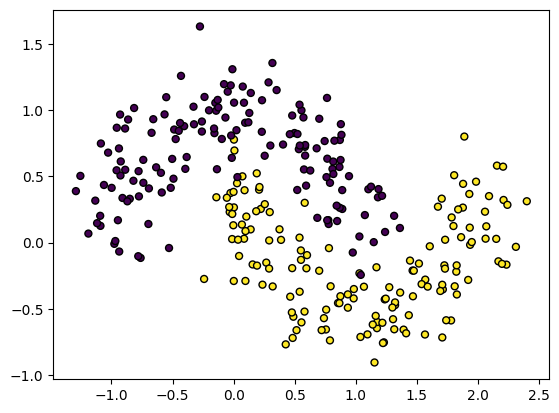

In [1]:

from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X1, Y1 = make_moons(n_samples=300, noise=0.2)
plt.scatter(X1[:, 0], X1[:, 1], marker='o',
 c=Y1, s=25, edgecolor='k')

#NN.SEQUENTIAL


In [ ]:
import torch
from torch import nn # Pacote neural networks
net = nn.Sequential(nn.Linear(),nn.ReLU(), nn.Linear())
